# Структура и содержание данных.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

file_id = '1ATASmLwbd-sVPOJ7kChU9fumc15lRvwK'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
df = pd.read_csv(download_url)

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [2]:
# Проверка общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
# Классификация признаков по типам данных
data_types = df.dtypes

type_counts = data_types.value_counts()

type_info = pd.DataFrame({
    'Type': data_types,
    'Count': [1] * len(data_types)
}).groupby('Type').count()

type_info['Features'] = data_types.groupby(data_types).apply(lambda x: list(x.index))
type_info = type_info.reset_index()

print(type_info)

      Type  Count                                           Features
0    int64     18  [Id, Year_Birth, Kidhome, Teenhome, Recency, M...
1  float64      1                                           [Income]
2   object      3           [Education, Marital_Status, Dt_Customer]


In [4]:
# Определение количества строк и столбцов
df.shape

(2240, 22)


**Общая информация о данных**

датасет: [Superstore Marketing Campaign Dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)

Датасет содержит 2240 записей и 22 столбца.

Данные включают числовые и категориальные переменные.

Основные переменные:

1. Id – идентификатор клиента.
2. Year_Birth – год рождения.
3. Education – уровень образования.
4. Marital_Status – семейное положение.
5. Income – доход.
6. Kidhome, Teenhome – количество детей разного возраста.
7. Dt_Customer – дата регистрации.
8. Recency – число дней с момента последней покупки.
9. MntWines, MntFruits, MntMeatProducts, ... – сумма покупок в разных категориях товаров.
10. NumDealsPurchases, NumWebPurchases, ... – количество покупок по различным каналам.
11. Response – целевая переменная (отклик на маркетинговую кампанию).
12. Complain – наличие жалоб от клиента.

3 категориальных признака (object): Education, Marital_Status, Dt_Customer.

1 признак с числовым непрерывным (вещественным) типом (float64): Income.

Остальные 18 признаков -  дискретные, целые числа (int64) .


Данные содержат идентификатор (Id), информацию о пользователях (Year_Birth, Education, Marital_Status, Income и др.), информацию о покупательской активности (MntWines, NumWebPurchases и др.).

Признак Dt_Customer представляет дату, что может потребовать преобразования формата.


# Выявление проблем и ошибок в данных

## Проверка наличия пропущенных значений

In [14]:
print("\nОбщее количество пропусков в датасете:", df.isnull().sum().sum())

# Подсчет пропусков в каждом столбце
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  #только столбцы с пропусками
print("\nКоличество пропусков в столбцах:")
print(missing_values)

# Процент пропусков
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]  #только столбцы с пропусками
print("\nПроцент пропусков в столбцах:")
print(missing_percent)


Общее количество пропусков в датасете: 24

Количество пропусков в столбцах:
Income    24
dtype: int64

Процент пропусков в столбцах:
Income    1.071429
dtype: float64


In [8]:
# Проверка строк с пропусками
rows_with_nan = df[df.isnull().any(axis=1)]

print("\nСтроки с пропусками:")
for index, row in rows_with_nan.iterrows():
    nan_columns = row.index[row.isnull()].tolist()  # Список колонок с NaN
    print(f"Индекс {index}: пропуски в колонках {', '.join(nan_columns)}")


Строки с пропусками:
Индекс 134: пропуски в колонках Income
Индекс 262: пропуски в колонках Income
Индекс 394: пропуски в колонках Income
Индекс 449: пропуски в колонках Income
Индекс 525: пропуски в колонках Income
Индекс 590: пропуски в колонках Income
Индекс 899: пропуски в колонках Income
Индекс 997: пропуски в колонках Income
Индекс 1096: пропуски в колонках Income
Индекс 1185: пропуски в колонках Income
Индекс 1213: пропуски в колонках Income
Индекс 1312: пропуски в колонках Income
Индекс 1515: пропуски в колонках Income
Индекс 1558: пропуски в колонках Income
Индекс 1693: пропуски в колонках Income
Индекс 1804: пропуски в колонках Income
Индекс 1858: пропуски в колонках Income
Индекс 1863: пропуски в колонках Income
Индекс 1880: пропуски в колонках Income
Индекс 1967: пропуски в колонках Income
Индекс 1983: пропуски в колонках Income
Индекс 2139: пропуски в колонках Income
Индекс 2165: пропуски в колонках Income
Индекс 2170: пропуски в колонках Income


## Проверка наличия дубликатов

In [9]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

## Проверка наличия выбросов

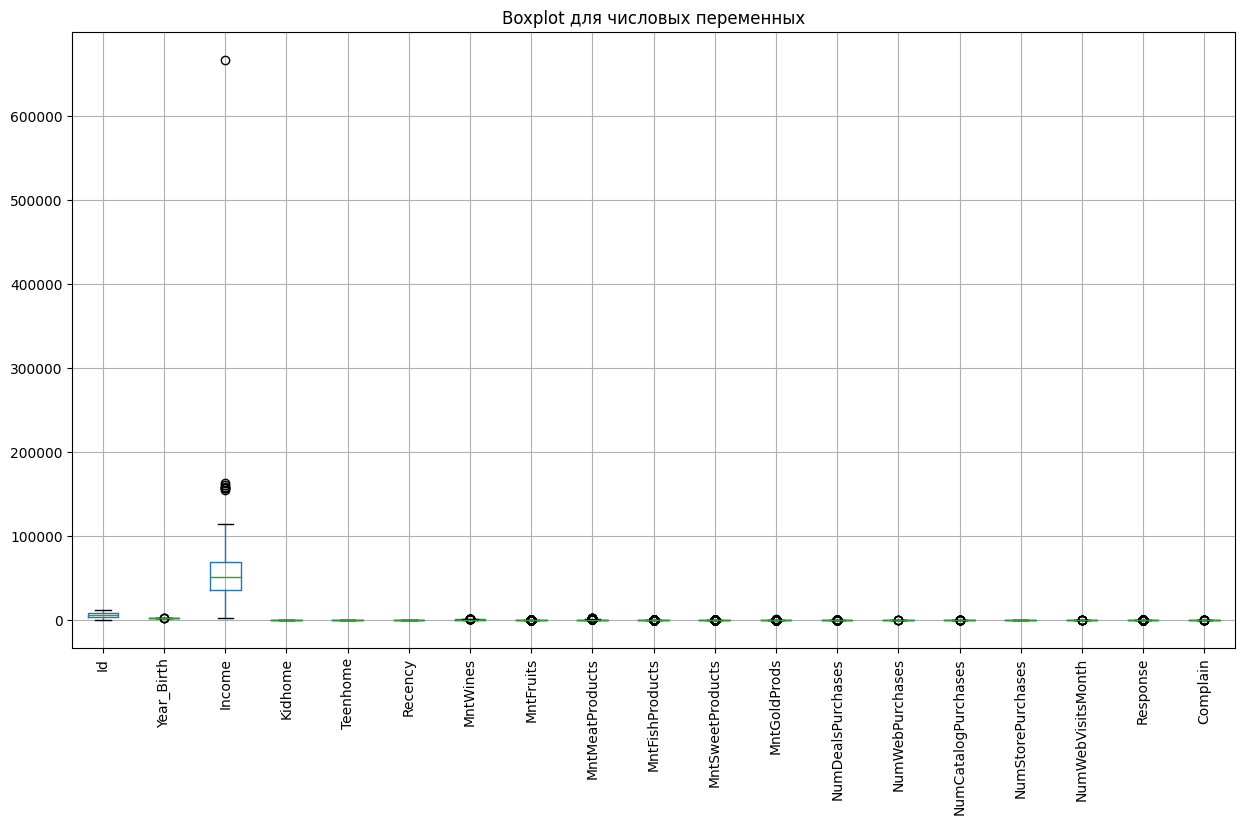

,0
Id,0
Year_Birth,3
Income,8
Kidhome,0
Teenhome,0
Recency,0
MntWines,35
MntFruits,227
MntMeatProducts,175
MntFishProducts,223


In [15]:
# Анализ выбросов для числовых переменных
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Использование метода IQR для выявления выбросов
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

# Визуализация выбросов через boxplot
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot(rot=90)
plt.title("Boxplot для числовых переменных")
plt.show()

outliers_iqr


<ipython-input-16-3ed111a217dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=z_outlier_counts.index, y=z_outlier_counts.values, palette="pastel")


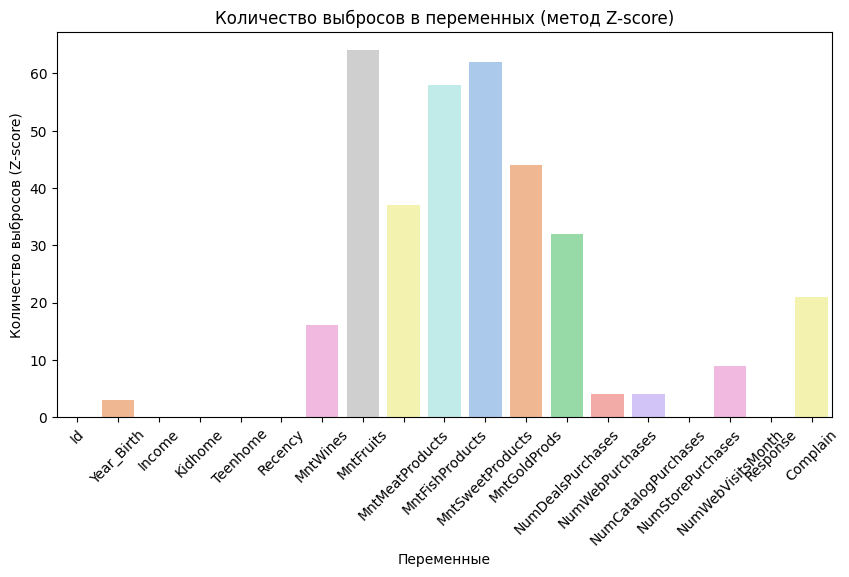

In [16]:
# Анализ выбросов с использованием Z-score (значения >3 или <-3 считаются выбросами)
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
z_outliers = (z_scores > 3) | (z_scores < -3)
z_outlier_counts = z_outliers.sum()

# Визуализация распределения выбросов по количеству (Z-score)
plt.figure(figsize=(10, 5))
sns.barplot(x=z_outlier_counts.index, y=z_outlier_counts.values, palette="pastel")
plt.xticks(rotation=45)
plt.xlabel("Переменные")
plt.ylabel("Количество выбросов (Z-score)")
plt.title("Количество выбросов в переменных (метод Z-score)")
plt.show()

Выбросы переменных доход (Income) и год рождения (Year_Birth) могут указывать на ошибки в данных или особенные группы клиентов (клиенты с аномально высоким доходом или слишком пожилые/молодые).

Выбросы в других переменных связаны с покупательской активностью, высокие расходы или покупки не всегда означают ошибку – они могут быть частью естественного потребительского поведения. Их полезнее изучить с точки зрения распределения, а не ограничивать выбросами.

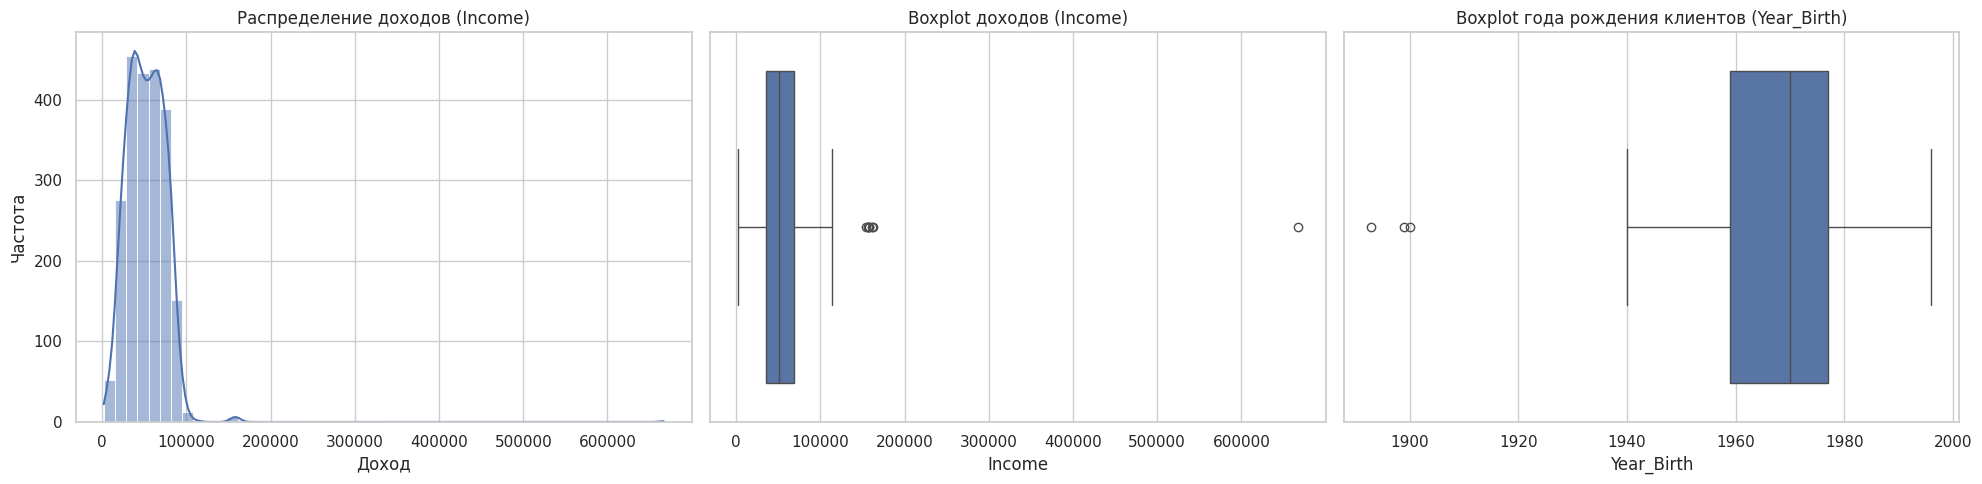

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Гистограмма доходов
sns.histplot(df["Income"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Распределение доходов (Income)")
axes[0].set_xlabel("Доход")
axes[0].set_ylabel("Частота")

# Boxplot доходов
sns.boxplot(x=df["Income"].dropna(), ax=axes[1])
axes[1].set_title("Boxplot доходов (Income)")

# Boxplot года рождения клиентов
sns.boxplot(x=df["Year_Birth"], ax=axes[2])
axes[2].set_title("Boxplot года рождения клиентов (Year_Birth)")

plt.tight_layout()
plt.show()

In [9]:
# Вычисление границ ящика для доходов и года рождения (IQR-метод)
Q1_income = df["Income"].dropna().quantile(0.25)
Q3_income = df["Income"].dropna().quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

Q1_year_birth = df["Year_Birth"].quantile(0.25)
Q3_year_birth = df["Year_Birth"].quantile(0.75)
IQR_year_birth = Q3_year_birth - Q1_year_birth
lower_bound_year_birth = Q1_year_birth - 1.5 * IQR_year_birth
upper_bound_year_birth = Q3_year_birth + 1.5 * IQR_year_birth

print("### Статистика по доходам (Income) ###")
print(f"Min: {df['Income'].min():.1f}")
print(f"Q1 (25%): {Q1_income:.1f}")
print(f"Median (50%): {df['Income'].median():.1f}")
print(f"Q3 (75%): {Q3_income:.1f}")
print(f"Max: {df['Income'].max():.1f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_income:.1f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_income:.1f}\n")

print("### Статистика по году рождения (Year_Birth) ###")
print(f"Min: {df['Year_Birth'].min():.0f}")
print(f"Q1 (25%): {Q1_year_birth:.0f}")
print(f"Median (50%): {df['Year_Birth'].median():.0f}")
print(f"Q3 (75%): {Q3_year_birth:.0f}")
print(f"Max: {df['Year_Birth'].max():.0f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_year_birth:.0f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_year_birth:.0f}\n")

### Статистика по доходам (Income) ###
Min: 1730.0
Q1 (25%): 35303.0
Median (50%): 51381.5
Q3 (75%): 68522.0
Max: 666666.0
Lower Bound (1.5*IQR): -14525.5
Upper Bound (1.5*IQR): 118350.5

### Статистика по году рождения (Year_Birth) ###
Min: 1893
Q1 (25%): 1959
Median (50%): 1970
Q3 (75%): 1977
Max: 1996
Lower Bound (1.5*IQR): 1932
Upper Bound (1.5*IQR): 2004



Доход (Income):
* Нижняя граница (1.5*IQR): -14525.5 (логически невозможное значение, значит нет выбросов вниз).
* Верхняя граница (1.5*IQR): 118350.5 – значения выше считаются выбросами.

Год рождения (Year_Birth):
* Нижняя граница (1.5*IQR): 1932.
* Верхняя граница (1.5*IQR): 2004.

**Выводы по итогам предварительной проверки данных.**

Наличие пропусков:
* В признаке Income (доход клиента) имеется 24 пропущенных значения, что составляет 1.07% данных.

Наличие дубликатов: Дубликаты отсутствуют.

Анализ выбросов:
Обнаруженные выбросы (метод IQR):
* Год рождения (Year_Birth) – 3 выброса.
* Доход (Income) – 8 выбросов (необычно высокие доходы). Распределение имеет длинный правый хвост – выбросы, доходы выше 118350.5 выглядят подозрительно.
* Покупательская активность (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) – значительное число выбросов (до 248 в MntSweetProducts).
* Маркетинговые показатели (Response, Complain) – 334 выброса в Response и 21 в Complain.

Визуализация показала сильные выбросы в данных о покупках.

Аномальные значения:
* Year_Birth: Минимальное значение 1893 – возможная ошибка.
* Income: Максимальное значение 666,666 – слишком высокое, возможно выброс или ошибка.
* NumWebVisitsMonth: Максимальное значение 20, возможный выброс.



# Характеристики переменных

## Основные описательные статистики

In [18]:
statistics_summary = df.describe()
statistics_summary

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [19]:
# Вычисление средних, медианных значений и стандартного отклонения по всем категориям расходов
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
spending_summary = df[spending_columns].agg(["mean", "median", "std", "min", "max"])
spending_summary

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
median,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [20]:
# Вычисление общей суммы расходов клиента
total_spending = df[spending_columns].sum(axis=1)
# Средние и медианные значения общей суммы расходов
total_spending_summary = total_spending.agg(["mean", "median", "std", "min", "max"])
total_spending_summary

,0
mean,605.798214
median,396.000000
std,602.249288
min,5.000000
max,2525.000000


**Анализ расходов по категориям товаров:**
* Вино (MntWines): среднее 303, медиана 173, максимум 1,493.
* Фрукты (MntFruits): среднее 26, медиана 8, максимум 199.
* Мясо (MntMeatProducts): среднее 166, медиана 67, максимум 1,725.
* Рыба (MntFishProducts): среднее 37, медиана 12, максимум 259.
* Сладости (MntSweetProducts): среднее 27, медиана 8, максимум 263.
* Золото (MntGoldProds): среднее 44, медиана 24, максимум 362.

Общая сумма расходов:
* Среднее 605.
* Медиана 396.
* Максимальное значение 2,525 (выбросы)

Распределение расходов очень неравномерное – большинство клиентов тратит мало, но есть группа с высокими расходами.

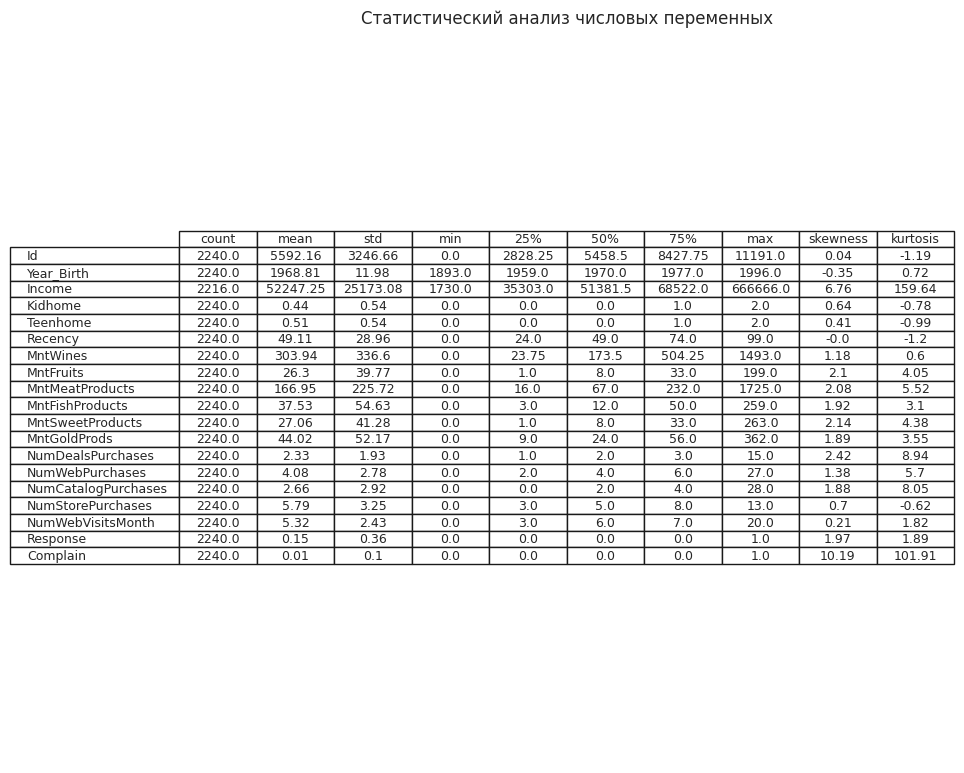

In [29]:
# Анализ основных статистик и зависимостей
numeric_summary = df[numeric_columns].describe().T

# Вычисление коэффициентов асимметрии (skewness) и эксцесса (kurtosis)
numeric_summary["skewness"] = df[numeric_columns].skew()
numeric_summary["kurtosis"] = df[numeric_columns].kurt()

fig, ax = plt.subplots(figsize=(10, len(numeric_summary) * 0.5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=np.round(numeric_summary.values, 2),
                 colLabels=numeric_summary.columns,
                 rowLabels=numeric_summary.index,
                 cellLoc='center', loc='center')

plt.title("Статистический анализ числовых переменных")
plt.show()

Симметрия и длинные хвосты
* Доход (Income): skewness = 6.76 (очень длинный правый хвост),что говорит о наличии небольшого количества клиентов с очень высоким доходом.
Высокий показатель эксцесса (159.64) подтверждает, что есть значительные выбросы.
* Жалобы (Complain): skewness = 10.19 (редкие случаи).
* Покупки (MntWines, MntMeatProducts, MntGoldProds) имеют положительный перекос, значит большая часть клиентов тратит мало, но есть несколько крупных покупателей.

## Распределения числовых признаков

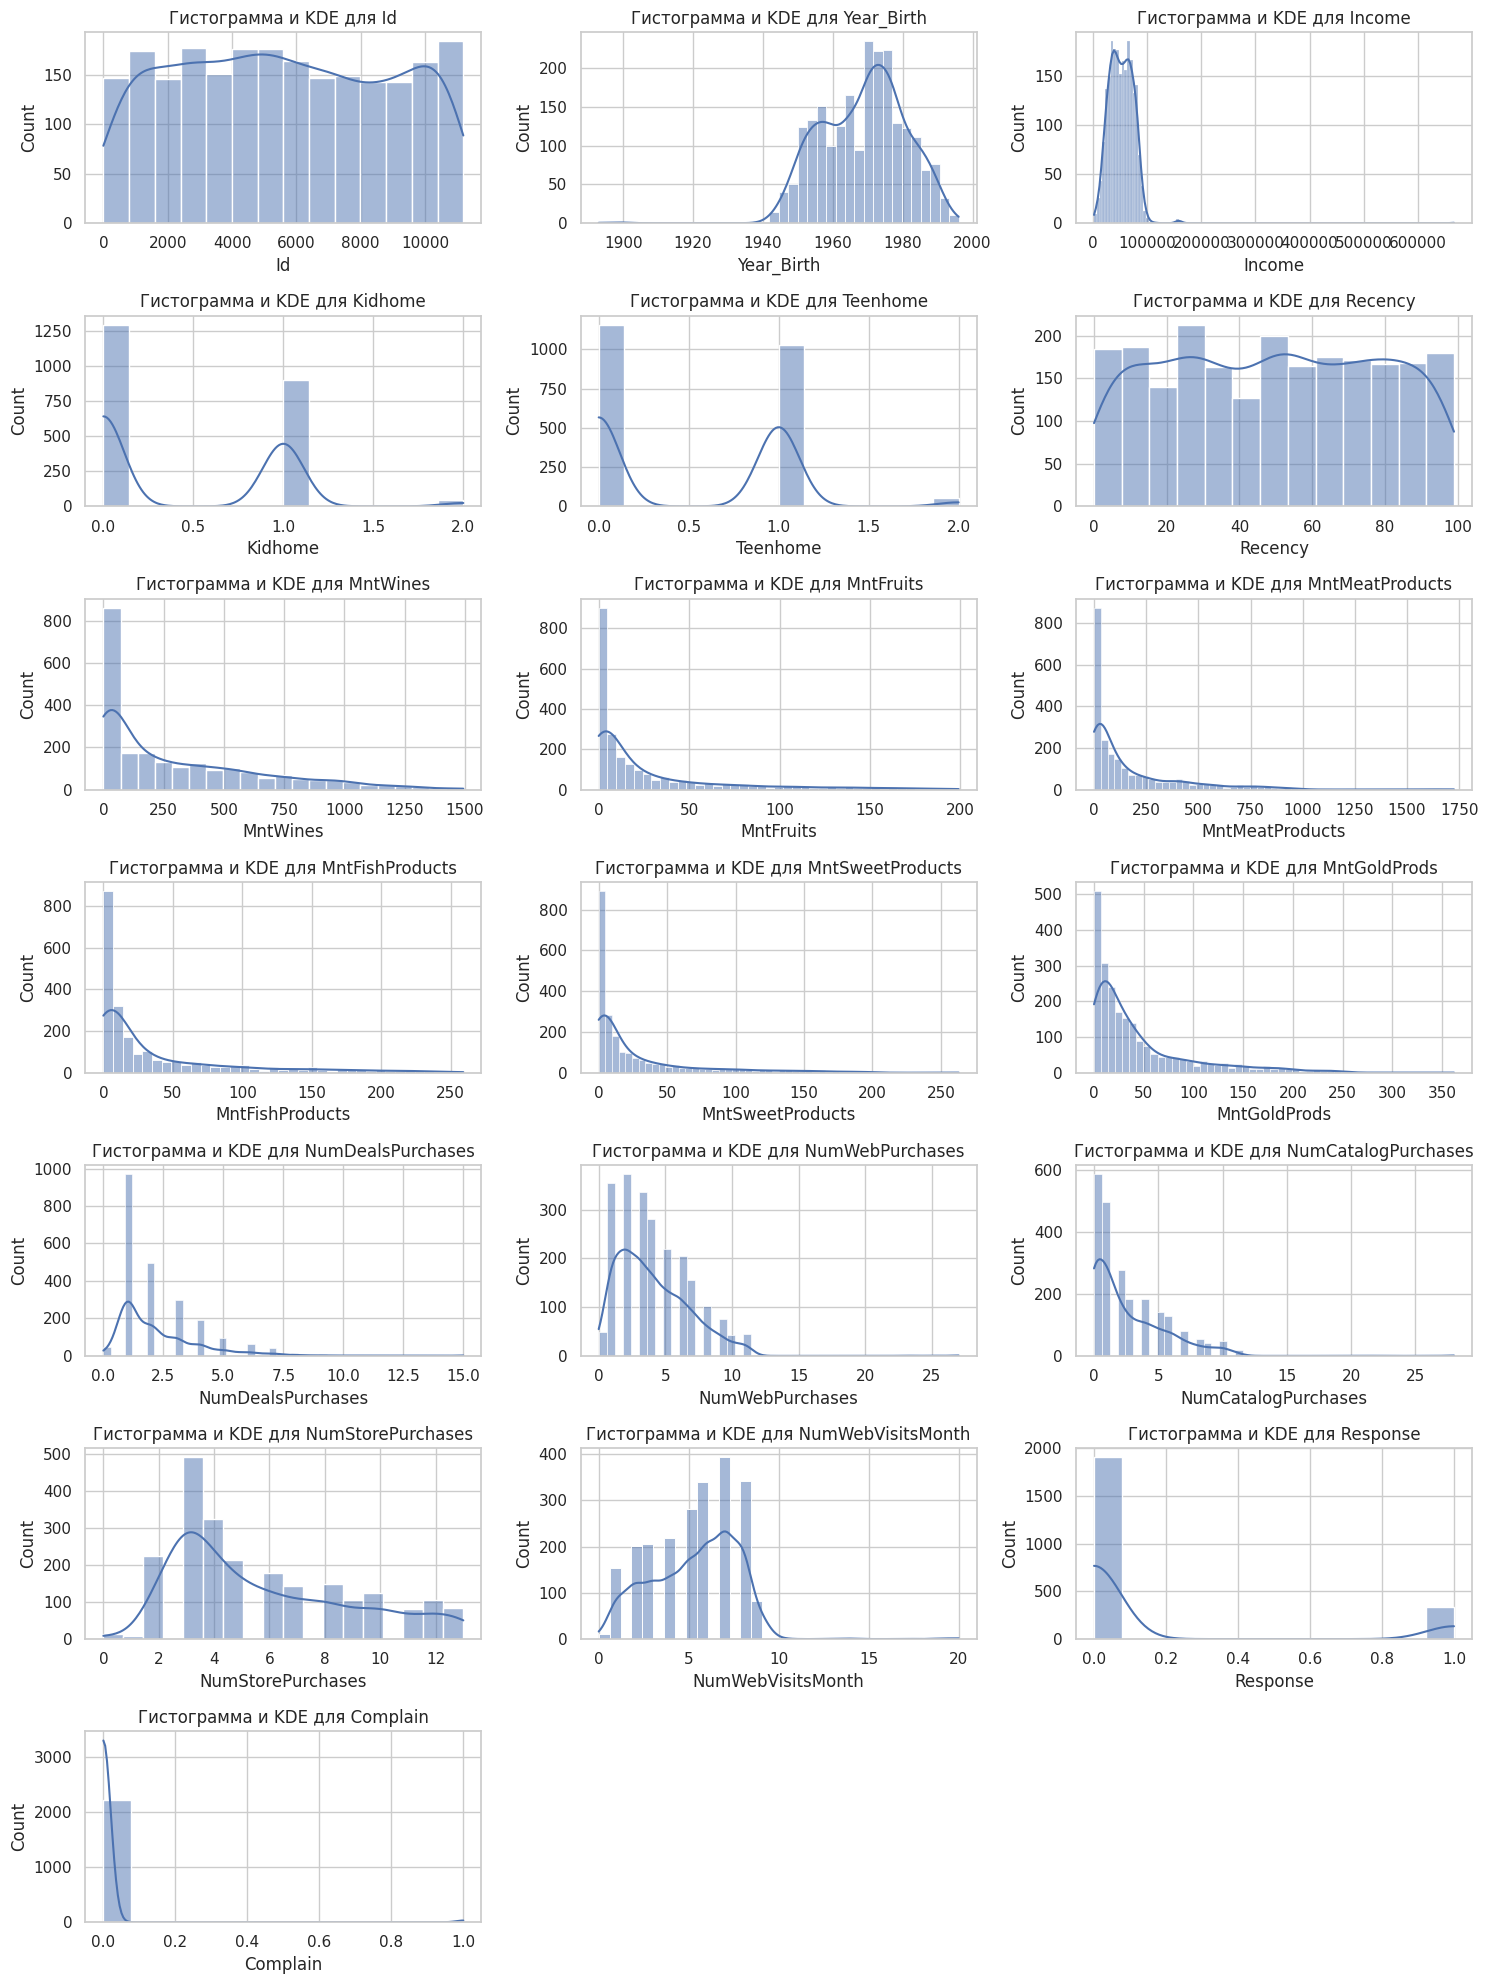

In [23]:
# Определение числовых переменных
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Построение гистограмм с KDE для всех числовых переменных
fig, axes = plt.subplots((len(numeric_columns) + 2) // 3, 3, figsize=(15, 20))  # Коррекция размера сетки
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Гистограмма и KDE для {col}')

# Удаление пустых подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Возраст (Year_Birth):
* Средний год рождения — 1968, медиана — 1970.
* Наблюдаются аномально старые клиенты (минимальный год рождения 1893), что требует дополнительной проверки. Для удобства анализа лучше создать новый признак "Возраст".
* Распределение слабонаклонное влево (асимметрия = -0.35), то есть большинство клиентов рождены после 1960 года.

Доход (Income): Средний доход 52,247, медиана 51,381.

Дети и подростки (Kidhome, Teenhome): Большинство клиентов не имеют детей (медиана 0). Наблюдается дискретное распределение, так как возможные значения ограничены (0, 1, 2). Можно преобразовать эти переменные в категориальные.

Распределение признаков (гистограммы и KDE)
* Доход и покупки демонстрируют сильную асимметрию, с длинными правыми хвостами.
* MntFruits, MntMeatProducts, MntSweetProducts имеют высокую асимметрию (>2.0), может потребовать логарифмирования.

# Корреляционный анализ.

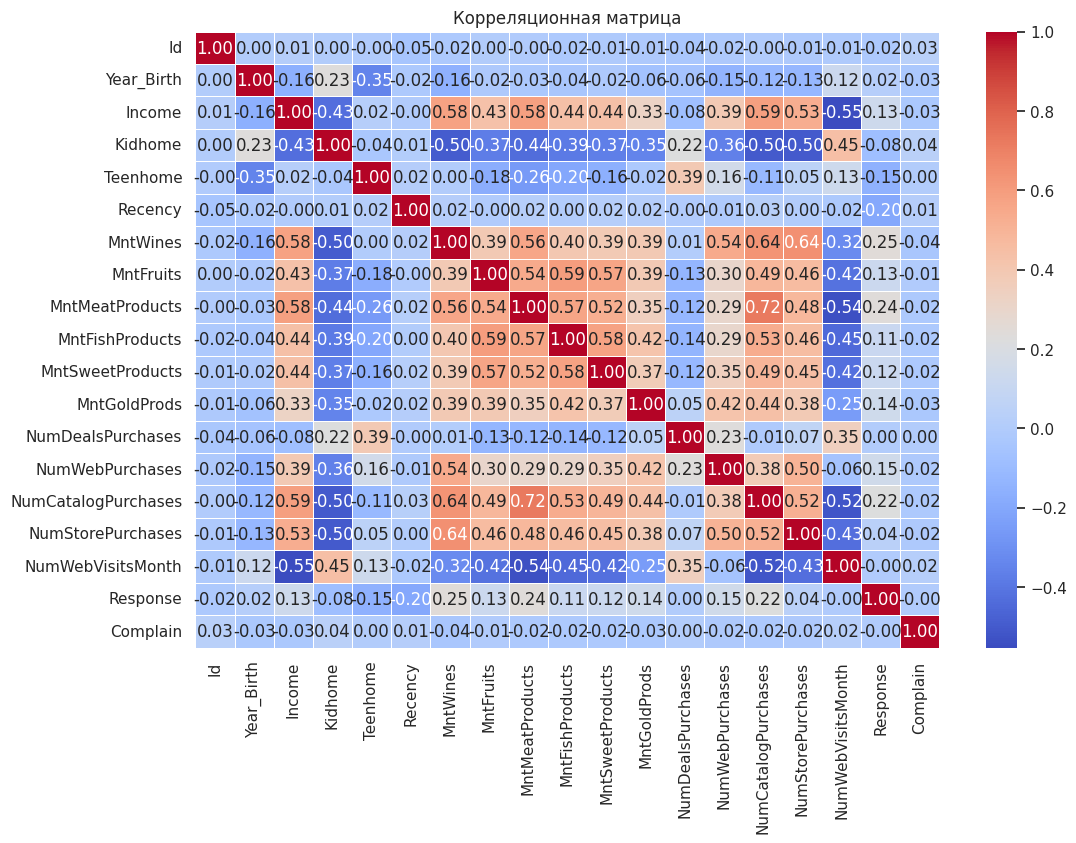

In [30]:
# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

# Тепловая карта корреляций
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()


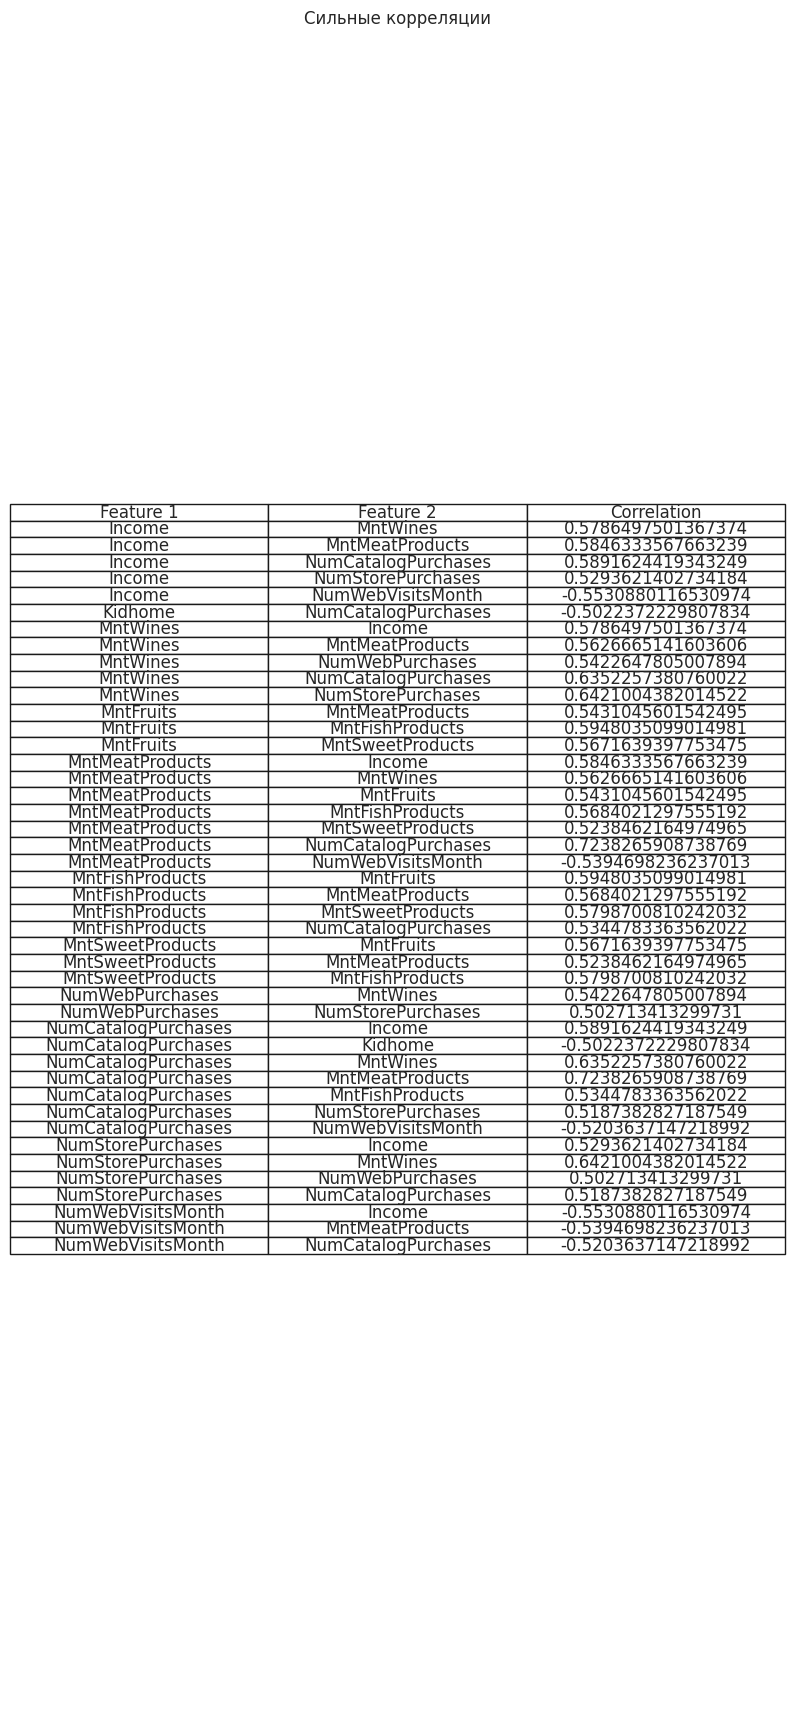

In [34]:
# Фильтрация сильных корреляций (по модулю > 0.5)
strong_correlations = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)].stack().reset_index()
strong_correlations.columns = ["Feature 1", "Feature 2", "Correlation"]
strong_correlations = strong_correlations[strong_correlations["Feature 1"] != strong_correlations["Feature 2"]].drop_duplicates()

# Визуализация таблицы
fig, ax = plt.subplots(figsize=(10, len(strong_correlations) * 0.5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=strong_correlations.values,
                 colLabels=strong_correlations.columns,
                 cellLoc='center', loc='center')
plt.title("Сильные корреляции")
plt.show()


Сильная корреляция:
* Доход (Income) положительно связан с суммами покупок (MntWines, MntMeatProducts, MntGoldProds и др.).
* MntMeatProducts, MntWines, MntGoldProds и другие категории расходов сильно коррелируют друг с другом (0.6-0.8), что указывает на общее потребительское поведение.
* NumCatalogPurchases и NumWebPurchases коррелируют с расходами (~0.5-0.6), что подтверждает, что более активные покупатели тратят больше.

Слабая корреляция:
* Число веб-визитов (NumWebVisitsMonth) имеет слабую обратную корреляцию с расходами – возможно, люди, совершающие больше онлайн-покупок, реже посещают сайт.

Слабая корреляция с целевой переменной (Response):
* Расходы на товары имеют низкую положительную корреляцию с Response, но незначительную.
* Recency (давность последней покупки) имеет отрицательную корреляцию с Response, что логично: чем реже клиент покупает, тем ниже его отклик.

**Выводы по корреляционному анализу**

Доход (Income) положительно коррелирует с расходами:
* MntWines (0.58), MntMeatProducts (0.58), NumCatalogPurchases (0.59), NumStorePurchases (0.53).
* Это говорит о том, что люди с более высоким доходом чаще совершают покупки и тратят больше.

Доход (Income) отрицательно коррелирует с количеством посещений веб-сайта (NumWebVisitsMonth) (-0.55):
* Возможно, богатые совершают покупки быстрее и не тратят много времени на сайт.
* Напротив, клиенты с низким доходом могут чаще посещать сайт, сравнивая товары или ожидая скидок.

Высокая корреляция между различными категориями покупок:
* Люди, которые тратят много на вино, также склонны тратить на мясо и другие товары. Это подтверждает наличие группы премиальных клиентов, покупающих дорогие товары.

# Анализ категориальных переменных

<ipython-input-35-59181c0699cc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="pastel")
<ipython-input-35-59181c0699cc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="pastel")


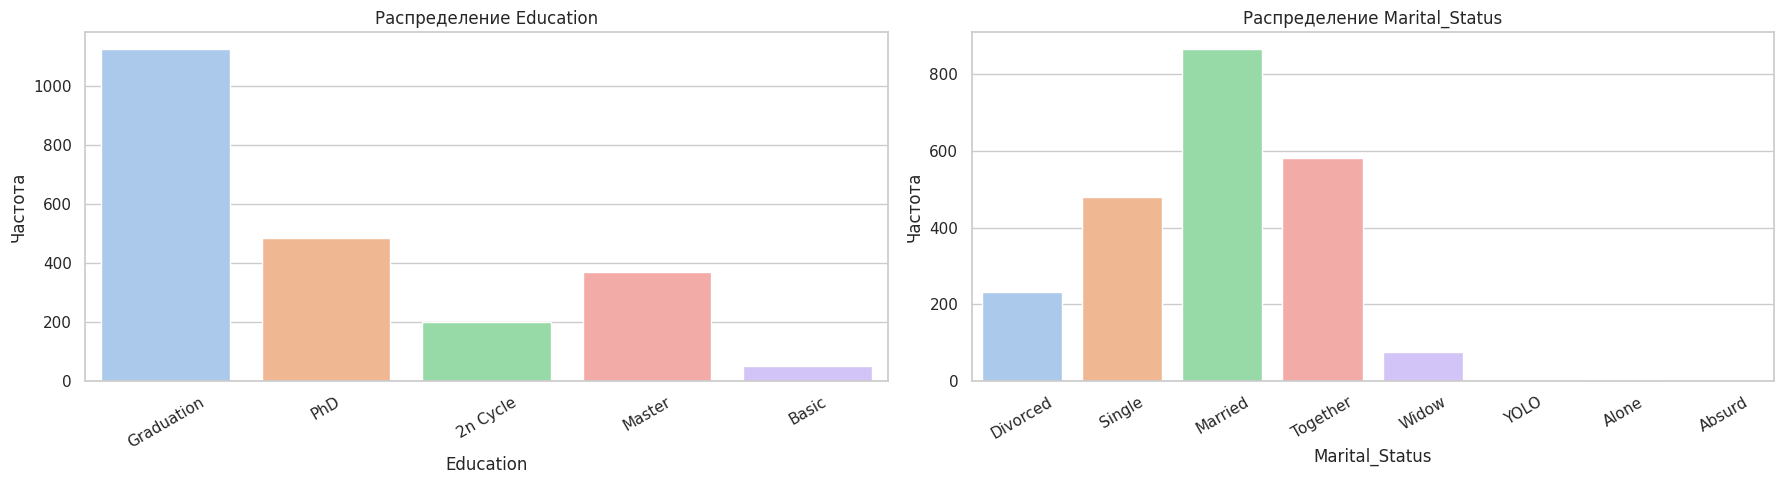

In [35]:
# Анализ категориальных переменных
categorical_columns = ["Education", "Marital_Status"]

# Визуализация распределения категориальных переменных
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for col, ax in zip(categorical_columns, axes):
    sns.countplot(data=df, x=col, ax=ax, palette="pastel")
    ax.set_title(f"Распределение {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Частота")
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

## Анализ аномалий в категориальных переменных

In [36]:
# Анализ уникальных значений в категориальных переменных
categorical_columns = df.select_dtypes(include=['object']).columns

# Уникальные значения в категориальных переменных
unique_values = {col: df[col].unique() for col in categorical_columns}

# Проверка количества уникальных значений
unique_counts = {col: df[col].nunique() for col in categorical_columns}

# Вывод уникальных значений и их количества
unique_values, unique_counts

({'Education': array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object),
  'Marital_Status': array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
         'Alone', 'Absurd'], dtype=object),
  'Dt_Customer': array(['6/16/2014', '6/15/2014', '5/13/2014', '11/5/2014', '8/4/2014',
         '3/17/2014', '1/29/2014', '1/18/2014', '11/1/2014', '12/27/2013',
         '9/12/2013', '7/12/2013', '10/16/2013', '5/10/2013', '11/9/2013',
         '1/8/2013', '7/23/2013', '1/7/2013', '5/28/2013', '3/26/2013',
         '3/15/2013', '12/2/2013', '11/23/2012', '10/13/2012', '9/14/2012',
         '6/29/2014', '5/31/2014', '5/30/2014', '4/27/2014', '11/4/2014',
         '10/29/2013', '9/10/2013', '10/5/2013', '9/5/2013', '4/25/2013',
         '4/20/2013', '3/30/2013', '1/3/2013', '2/14/2013', '11/1/2013',
         '3/1/2013', '12/19/2012', '12/15/2012', '2/12/2012', '9/17/2012',
         '11/9/2012', '12/5/2014', '4/28/2014', '3/29/2014', '6/3/2014',
         '4/3/2014', '

**Выводы по категориальным переменным:**

Образование (Education):

* Большинство клиентов имеют Graduation или PhD.
* Меньше всего клиентов с Basic образованием.

Семейное положение (Marital_Status):
* Больше всего клиентов в статусе Married и Together.
* Есть нестандартные категории, такие как YOLO и Absurd – вероятно некорректные записи.


# Исследование целевой переменной (Response)

<ipython-input-20-66be1d596cbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Response"], palette="viridis")


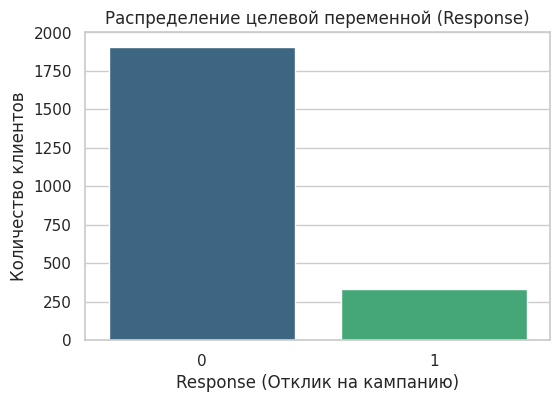

,proportion
Response,
0,85.089286
1,14.910714


In [20]:
# Визуализация распределения целевой переменной (Response)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Response"], palette="viridis")
plt.title("Распределение целевой переменной (Response)")
plt.xlabel("Response (Отклик на кампанию)")
plt.ylabel("Количество клиентов")
plt.show()

# Подсчет количества классов
response_counts = df["Response"].value_counts(normalize=True) * 100
response_counts


Дисбаланс классов:
* 85.1% клиентов не откликнулись (Response = 0).
* 14.9% клиентов откликнулись (Response = 1).

## Какие переменные влияют на отклик.

<ipython-input-21-aa1c317fc511>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Response", y="Income", data=df, palette="coolwarm")


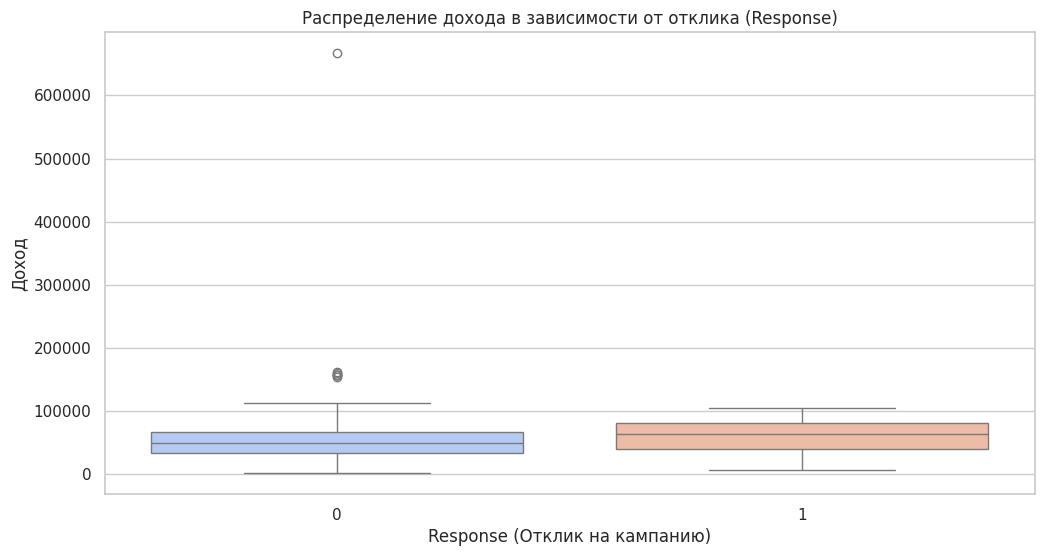

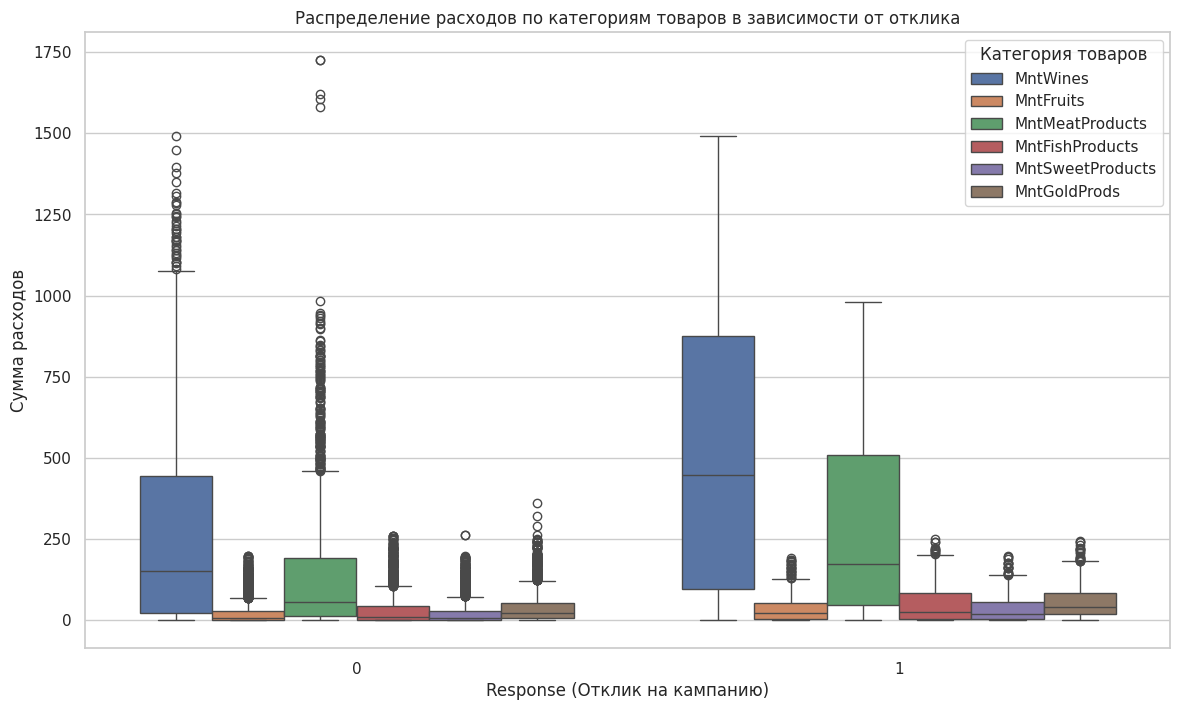

In [21]:
# Анализ распределения расходов в зависимости от Response
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Income", data=df, palette="coolwarm")
plt.title("Распределение дохода в зависимости от отклика (Response)")
plt.xlabel("Response (Отклик на кампанию)")
plt.ylabel("Доход")
plt.show()

# Влияние расходов на различные категории товаров
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_melted = df.melt(id_vars=["Response"], value_vars=spending_columns, var_name="Category", value_name="Amount")

plt.figure(figsize=(14, 8))
sns.boxplot(x="Response", y="Amount", hue="Category", data=df_melted)
plt.title("Распределение расходов по категориям товаров в зависимости от отклика")
plt.xlabel("Response (Отклик на кампанию)")
plt.ylabel("Сумма расходов")
plt.legend(title="Категория товаров")
plt.show()


Доход (Income)

* Клиенты с более высоким доходом имеют незначительно больший отклик. Однако разброс данных велик, что говорит о том, что доход не является решающим фактором.

Расходы на товары (MntWines, MntMeatProducts, MntGoldProds и др.)
* Люди, которые тратят больше на вино, мясо, золото – чаще откликаются на маркетинговые кампании.

Выводы:
* Наибольшее влияние на отклик оказывают расходы на премиальные товары (MntWines, MntMeatProducts, MntGoldProds).
* Доход сам по себе не является решающим фактором, но люди, тратящие много, чаще откликаются.
* Группы, тратящие мало, менее склонны реагировать на маркетинговую кампанию.

## Связь категориальных переменных с откликом

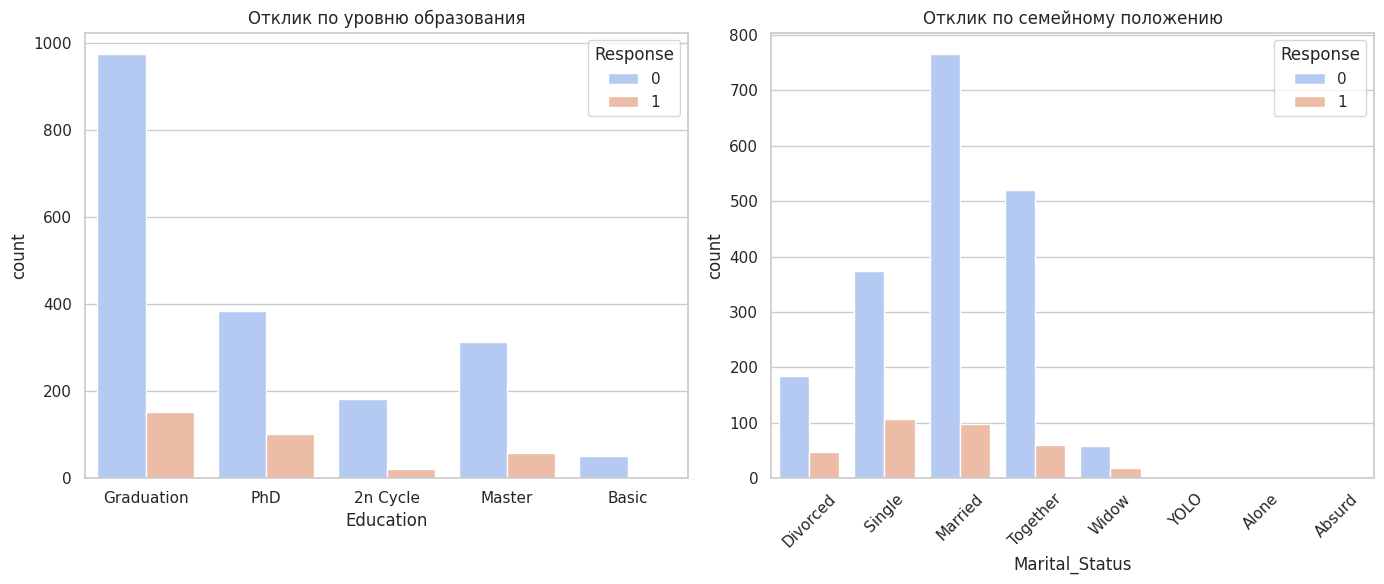

In [28]:
# Визуализация категориальных признаков в разрезе Response
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Образование
sns.countplot(x="Education", hue="Response", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Отклик по уровню образования")

# Семейное положение
sns.countplot(x="Marital_Status", hue="Response", data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Отклик по семейному положению")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Основные выводы:

Образование (Education)

* Люди с уровнем образования Graduation и PhD чаще откликаются на маркетинговые кампании.
* Люди с базовым образованием (Basic) реже всего откликаются.

Семейное положение (Marital_Status)
* Самые высокие отклики у клиентов в статусе Single и Married.
* Подозрительные категории (YOLO, Absurd, Alone) имеют мало наблюдений и требуют обработки.

# Выводы по исследовательскому анализу данных (EDA)
#### **1. Общая информация о данных**
* Всего признаков: **22** (3 категориальных, 1 непрерывный числовой, 18 дискретных).
* **Категориальные признаки:** Education, Marital_Status, Dt_Customer.
* **Непрерывный числовой признак:** Income (доход клиента).
* **Дискретные числовые признаки:** Признаки, связанные с покупками, маркетинговой активностью и откликами клиентов.


####**2. Первичный анализ данных**
* **Пропуски:**
  * Признак Income имеет 24 пропущенных значения (1.07%).
* **Дубликаты:**
  * Дубликаты отсутствуют.
* **Выбросы (метод IQR):**
  * Year_Birth: 3 выброса (год рождения < 1932).
  * Income: 8 выбросов (значения > 118,350.5).
  * Покупки (MntWines, MntFruits, MntMeatProducts и др.): Значительное количество выбросов.
  * Маркетинговые показатели: Выбросы в Response (334 случая) и Complain (21 случай).
* **Аномальные значения:**
  * Year_Birth: Минимальное значение 1893.
  * Income: Максимум 666,666.
  * NumWebVisitsMonth: Максимум 20.

#### **3. Распределение признаков и основные статистики**
* **Доход (Income):**
  * Средний доход: 52,247; медиана: 51,381.
  * Распределение имеет длинный правый хвост (асимметрия = 6.76).
  * Верхняя граница выбросов: 118,350.5.
* **Возраст (Year_Birth):**
  * Средний год рождения: 1968; медиана: 1970.
  * Выбросы: Годы рождения < 1932 (возможные ошибки).
* **Покупательская активность:**
  * MntWines: Среднее 303, медиана 173, максимум 1,493.
  * MntMeatProducts: Среднее 166, медиана 67, максимум 1,725.
  * Расходы на премиальные товары (вино, мясо, золото) имеют сильные выбросы.

#### **4. Корреляционный анализ**
* **Положительные корреляции:**
  * Income и расходы на премиальные товары (MntWines, MntMeatProducts, MntGoldProds): 0.58-0.6.
  * Различные категории расходов (MntWines, MntMeatProducts, MntGoldProds) сильно коррелируют друг с другом (0.6-0.8).

* **Отрицательные корреляции:**
  * Income и NumWebVisitsMonth (-0.55): Люди с высоким доходом реже посещают сайт.

* **Слабая корреляция с целевой переменной (Response):**
  * Расходы на премиальные товары имеют слабую положительную корреляцию с Response.
  * Recency имеет отрицательную корреляцию с Response (чем реже клиент покупает, тем ниже вероятность отклика).

#### **5. Анализ категориальных переменных**
* **Образование (Education):**
  * Большинство клиентов имеют Graduation или PhD, они же чаще других откликаются на маркетинговую кампанию.
* **Семейное положение (Marital_Status):**
  * Наибольшее количество откликов в абсолютных значениях в группах Single и Married.
  * Странные категории (YOLO, Absurd, Alone) требуют обработки.
* **Дата регистрации (Dt_Customer):**
  * Признак можно преобразовать в datetime и создать дополнительные характеристики.

#### **6. Анализ целевой переменной (Response)**
* **Дисбаланс классов:**
  * 85.1% клиентов не откликнулись.
  * 14.9% клиентов откликнулись.
* **Факторы влияния на отклик:**
  * Расходы на премиальные товары (MntWines, MntMeatProducts, MntGoldProds) — клиенты, которые тратят больше, чаще откликаются.
  * Доход сам по себе не является решающим фактором, но клиенты с высоким доходом чаще откликаются.

#### **Предложения**
1. **Обработка данных:**
   * Удалить или объединить странные категории в Marital_Status (YOLO, Absurd, Alone).
   * Заполнить пропущенные значения в Income.
   * Удалить выбросы в Year_Birth и Income.

2. **Коррекция дисбаланса классов:**
   * Использовать техники oversampling или undersampling.
   
3. **Маркетинговые стратегии:**
   * Сфокусироваться на клиентах, которые активно тратят на премиальные товары.
   * Сегментировать клиентов по доходу и покупательской активности для таргетинга.
   * Разработать стратегии повторного вовлечения для клиентов с низкой активностью (Recency).

